Machine learning project - Classification - Fertility dataset

Import section

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

Defining constants

In [9]:
data_file_name = "./files/fertility_Diagnosis.csv"

data_columns = [
    'Season',
    'Age',
    'Childish diseases',
    'Accidents or serious trauma',
    'Surgical intervention',
    'High fevers in the last year',
    'Frequency of alcohol consumption',
    'Smoking habit',
    'Number of hours spent sitting per day',
    'Output'
]

# columns used for prediction
columns_x = [
    'Season',
    'Age',
    'Childish diseases',
    'Accidents or serious trauma',
    'Surgical intervention',
    'High fevers in the last year',
    'Frequency of alcohol consumption',
    'Smoking habit',
    'Number of hours spent sitting per day'
]

# columns that are predicted
columns_y = [
    'Output'
]

# random-state, used as seed value for other libraries, so that we always get the same result
RS = 1
# number of splits during cross-validation
NUM_SPLITS = 5

Dataset loading

In [10]:
# read data from csv file
df = pd.read_csv(data_file_name)
X = df[columns_x].values
Y = df[columns_y].values
df

,Season,Age,Childish diseases,Accidents or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


Function for creating and evaluating model

In [21]:
def create_and_evaluate_model(X: np.ndarray, Y: np.ndarray, kf: KFold, pca=None, class_weight=None):
    # iterate over cross-validation sets
    # train_index - indices of records used for training at current iteration over cross-validation sets
    # test_index - indices of records used for testing at current iteration over cross-validation sets

    for train_index, test_index in kf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        # create and train model
        model = RandomForestClassifier(random_state=RS,
                                                class_weight=class_weight,
                                                n_estimators=10)
        model.fit(X_train, np.reshape(y_train, (y_train.shape[0])))

        # get model score on test set
        score = model.score(X_test, y_test)
        # get model score on whole data-set
        score_ds = model.score(X, Y)

        # test model on members of class 'O'
        df_test = df.loc[df.Output == 'O']
        if pca:
            predictions = model.predict(pca.transform(df_test[columns_x].values))
        else:
            predictions = model.predict(df_test[columns_x].values)

        # print results
        print('Test score: ', score)
        print('Whole data-set score: ', score_ds)
        print(predictions)

Creating cross-validation split and create basic model

In [22]:
# create cross-validation
kf = KFold(n_splits=NUM_SPLITS, shuffle=True, random_state=RS)

create_and_evaluate_model(X, Y, kf)

Test score:  0.85
Whole data-set score:  0.96
['O' 'O' 'N' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'N' 'N']
Test score:  0.8
Whole data-set score:  0.93
['O' 'O' 'N' 'N' 'N' 'N' 'N' 'O' 'N' 'O' 'O' 'O']
Test score:  0.95
Whole data-set score:  0.95
['O' 'N' 'O' 'N' 'N' 'O' 'O' 'O' 'O' 'O' 'N' 'O']
Test score:  0.9
Whole data-set score:  0.97
['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'N' 'N' 'O']
Test score:  0.85
Whole data-set score:  0.94
['N' 'O' 'O' 'O' 'O' 'O' 'O' 'N' 'N' 'N' 'N' 'O']


Building decision tree for feature reduction

[Text(125.55000000000001, 205.35999999999999, 'Age <= 0.655\ngini = 0.211\nsamples = 100\nvalue = [88, 12]\nclass = N'),
 Text(26.784000000000002, 181.2, 'Sitt <= 0.815\ngini = 0.043\nsamples = 46\nvalue = [45, 1]\nclass = N'),
 Text(13.392000000000001, 157.04, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]\nclass = N'),
 Text(40.176, 157.04, 'Season <= 0.335\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = N'),
 Text(26.784000000000002, 132.88, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = N'),
 Text(53.568000000000005, 132.88, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = N'),
 Text(224.31600000000003, 181.2, 'Accid <= 0.5\ngini = 0.324\nsamples = 54\nvalue = [43, 11]\nclass = N'),
 Text(140.616, 157.04, 'Sitt <= 0.345\ngini = 0.461\nsamples = 25\nvalue = [16, 9]\nclass = N'),
 Text(80.352, 132.88, 'Smok <= 0.5\ngini = 0.337\nsamples = 14\nvalue = [11, 3]\nclass = N'),
 Text(40.176, 108.72, 'Season <= 0.665\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = N'),
 Text(26.7840

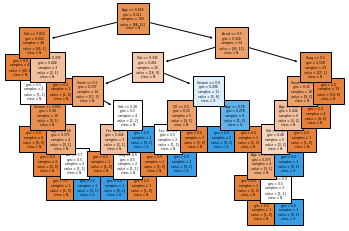

In [24]:
columns_x_graph = [
    'Season',
    'Age',
    'CD',
    'Accid',
    'Surg',
    'Fev',
    'Alc',
    'Smok',
    'Sitt'
]
tree_model = tree.DecisionTreeClassifier(random_state=RS)
tree_model.fit(X, Y)
tree.plot_tree(decision_tree=tree_model, feature_names=columns_x_graph, class_names=['N', 'O'], filled=True, fontsize=3)

After running Decision tree algorithm, we have decided to remove following features:
- Season
- Childish diseases

In [27]:
columns_x = [
    'Age',
    'Accidents or serious trauma',
    'Surgical intervention',
    'High fevers in the last year',
    'Frequency of alcohol consumption',
    'Smoking habit',
    'Number of hours spent sitting per day'
]
X = df[columns_x].values
Y = df[columns_y].values
create_and_evaluate_model(X, Y, kf)

Test score:  0.85
Whole data-set score:  0.95
['O' 'O' 'N' 'O' 'O' 'O' 'N' 'O' 'O' 'O' 'N' 'N']
Test score:  0.85
Whole data-set score:  0.96
['O' 'O' 'O' 'N' 'N' 'O' 'N' 'O' 'O' 'O' 'O' 'O']
Test score:  0.9
Whole data-set score:  0.93
['O' 'N' 'O' 'N' 'N' 'N' 'N' 'O' 'O' 'O' 'N' 'O']
Test score:  0.95
Whole data-set score:  0.97
['O' 'O' 'O' 'O' 'O' 'O' 'N' 'O' 'O' 'N' 'N' 'O']
Test score:  0.75
Whole data-set score:  0.93
['N' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'N' 'O' 'O']


Using PCA - Principal component analysis for feature reduction

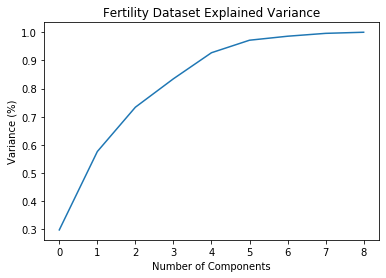

In [29]:
columns_x = [
    'Season',
    'Age',
    'Childish diseases',
    'Accidents or serious trauma',
    'Surgical intervention',
    'High fevers in the last year',
    'Frequency of alcohol consumption',
    'Smoking habit',
    'Number of hours spent sitting per day'
]
X = df[columns_x].values
Y = df[columns_y].values
pca = PCA(random_state=RS)
pca.fit(X)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Fertility Dataset Explained Variance')
plt.show()

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29811688, 0.57643501, 0.73384095, 0.83477702, 0.92728016,
       0.97170118, 0.98586074, 0.99606143, 1.        ])

We can see that first 6 vectors describe more than 97% of overall variance, so we will use pca algorithm with 6 components.

In [36]:
X = df[columns_x].values
Y = df[columns_y].values
pca = PCA(random_state=RS, n_components=6)
pca.fit(X)
X = pca.transform(X)
create_and_evaluate_model(X, Y, kf, pca=pca)

Test score:  0.85
Whole data-set score:  0.95
['O' 'O' 'N' 'O' 'O' 'O' 'N' 'O' 'O' 'O' 'N' 'N']
Test score:  0.8
Whole data-set score:  0.94
['O' 'O' 'O' 'N' 'N' 'O' 'N' 'N' 'N' 'O' 'O' 'O']
Test score:  0.85
Whole data-set score:  0.94
['O' 'N' 'O' 'O' 'O' 'N' 'O' 'N' 'O' 'O' 'N' 'O']
Test score:  0.95
Whole data-set score:  0.96
['N' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'N' 'N' 'N' 'O']
Test score:  0.85
Whole data-set score:  0.94
['N' 'O' 'O' 'O' 'O' 'O' 'O' 'N' 'N' 'N' 'N' 'O']


After seeing these results, we deduced that decision tree feature reduction worked better.

Methods for balancing dataset classes

- Undersampling

In [44]:
from imblearn.under_sampling import RandomUnderSampler
X = df[columns_x].values
Y = df[columns_y].values
rus = RandomUnderSampler(random_state=RS)
X_rus, Y_rus = rus.fit_sample(X, Y)
create_and_evaluate_model(X_rus, Y_rus, kf)

Test score:  0.4
Whole data-set score:  0.875
['O' 'N' 'O' 'O' 'O' 'O' 'N' 'O' 'N' 'O' 'O' 'O']
Test score:  0.8
Whole data-set score:  0.9583333333333334
['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']
Test score:  0.4
Whole data-set score:  0.8333333333333334
['O' 'N' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'N' 'O' 'O']
Test score:  0.8
Whole data-set score:  0.9583333333333334
['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'N' 'O']
Test score:  0.75
Whole data-set score:  0.9583333333333334
['N' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']


- Oversampling

In [59]:
from imblearn.over_sampling import RandomOverSampler
X = df[columns_x].values
Y = df[columns_y].values

# ros = RandomOverSampler()
# X_ros, Y_ros = ros.fit_sample(X, Y.reshape((Y.size, )))
# Y_ros.reshape((Y_ros.size, 1))
# create_and_evaluate_model(X_ros, Y_ros, kf)
def nm(X,Y, kf):
    for train_index, test_index in kf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        ros = RandomOverSampler()
        X_train, y_train = ros.fit_sample(X_train, y_train.reshape((y_train.size, )))
        y_train.reshape((y_train.size, 1))

        # create and train model
        model = RandomForestClassifier(random_state=RS,
                                                n_estimators=10)
        model.fit(X_train, np.reshape(y_train, (y_train.shape[0])))

        # get model score on test set
        score = model.score(X_test, y_test)
        # get model score on whole data-set
        score_ds = model.score(X, Y)

        # test model on members of class 'O'
        df_test = df.loc[df.Output == 'O']
        predictions = model.predict(df_test[columns_x].values)

        # print results
        print('Test score: ', score)
        print('Whole data-set score: ', score_ds)
        print(predictions)
nm(X, Y, kf)

Test score:  0.85
Whole data-set score:  0.95
['O' 'O' 'N' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'N' 'O']
Test score:  0.8
Whole data-set score:  0.95
['O' 'O' 'O' 'N' 'N' 'O' 'N' 'O' 'N' 'O' 'O' 'O']
Test score:  0.8
Whole data-set score:  0.95
['O' 'N' 'O' 'O' 'O' 'N' 'O' 'O' 'O' 'O' 'O' 'O']
Test score:  0.95
Whole data-set score:  0.99
['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'N' 'O' 'O']
Test score:  0.8
Whole data-set score:  0.95
['N' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']
